In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
params = {}

In [5]:
train_X = pd.read_csv("./data/train/train_x.csv")
train_y = pd.read_csv("./data/train/train_y.csv")

test_x = pd.read_csv("./data/test/test_x.csv")
test_y = pd.read_csv("./data/test/test_y.csv")

In [6]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(train_X)
X_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [9]:
input_neuron = len(test_x.columns)

In [32]:
classifier = Sequential()
classifier.add(Dense(output_dim = 18, init = 'uniform', activation = 'relu', input_dim = input_neuron))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mae"])

classifier.fit(X_train, y_train, batch_size = 30, nb_epoch = 100, validation_split= 0.2)


C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=34, units=18, kernel_initializer="uniform")`
  
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initialize

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 1s 5ms/step - loss: 1.0075 - mean_absolute_error: 0.6848 - val_loss: 0.9730 - val_mean_absolute_error: 0.7463
Epoch 2/100
256/256 [==============================] - 0s 173us/step - loss: 1.0061 - mean_absolute_error: 0.6835 - val_loss: 0.9789 - val_mean_absolute_error: 0.7494
Epoch 3/100
256/256 [==============================] - 0s 265us/step - loss: 1.0046 - mean_absolute_error: 0.6819 - val_loss: 0.9844 - val_mean_absolute_error: 0.7524
Epoch 4/100
256/256 [==============================] - 0s 210us/step - loss: 1.0031 - mean_absolute_error: 0.6801 - val_loss: 0.9907 - val_mean_absolute_error: 0.7559
Epoch 5/100
256/256 [==============================] - 0s 307us/step - loss: 1.0006 - mean_absolute_error: 0.6780 - val_loss: 0.9959 - val_mean_absolute_error: 0.7590
Epoch 6/100
256/256 [==============================] - 0s 196us/step - loss: 0.9974 - mean_absolute_error: 0.6754 - val_lo

In [47]:
if os.path.exists("./model") is False:
    os.mkdir("./model")
pickle.dump(classifier, open("./model/ANN.pkl", "wb"))

In [33]:
test_x["TVD_pred"] = sc_y.inverse_transform(classifier.predict(X_test))

In [34]:
df = pd.concat([test_x, test_y], axis=1)
df.rename(columns={"Z": "TVD"}, inplace=True)
df["model_error"] = df.TVD -  df.TVD_pred

In [35]:
print(f"XGBoost MAE score: {np.round(mean_absolute_error(df.TVD, df.TVD_pred))}m")
print(f"XGBoost R2 socre: {np.round(r2_score(df.TVD, df.TVD_pred), 4)}")

XGBoost MAE score: 121.0m
XGBoost R2 socre: 0.9958


In [36]:
plt.style.use("ggplot")

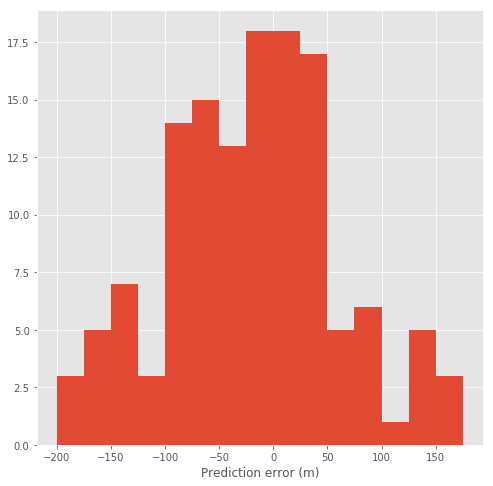

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.hist(df["model_error"], bins=np.arange(-200, 200,25))
plt.xlabel("Prediction error (m)")
plt.show()

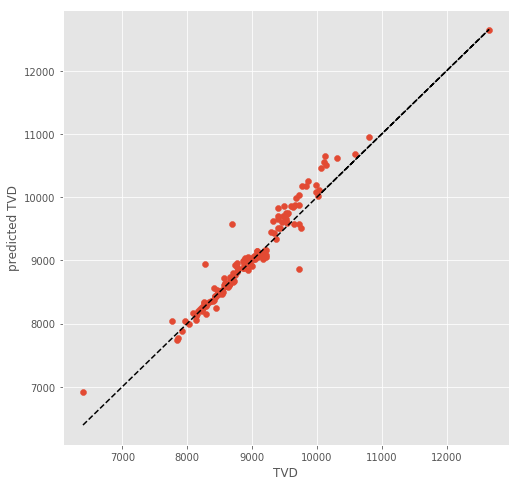

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(df.loc[df.TVD >1000].TVD, df.loc[df.TVD >1000].TVD_pred)
plt.plot(df.loc[df.TVD >1000].TVD, df.loc[df.TVD >1000].TVD, color="black", linestyle="--")
plt.xlabel("TVD")
plt.ylabel("predicted TVD")
plt.show()

In [52]:
df_global = pd.read_csv("global_test_df.csv")

In [53]:
df_global.rename(columns={"Z":"TVD"}, inplace=True)
df_global["TVD_pred"] = df["TVD_pred"]

In [54]:
if os.path.exists("model_predictions") is False:
    os.mkdir("./model_predictions")
df_global.to_csv("./model_predictions/ann_predictions.csv")